# Import lib

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# The latest CDF library https://spdf.gsfc.nasa.gov/pub/software/cdf/dist/latest/
from spacepy import pycdf

# os.environ["CDF_LIB"] = "C:\\Program Files\\CDF_Distribution\\cdf39_0-dist\\lib"
os.environ["CDF_LIB"] = "/Applications/cdf/cdf39_0-dist/lib"

# sys.path.append('../lib/')
sys.path.append('./lib/')

import juice_cdf_lib as juice_cdf

# Setting and Read CDF file

In [3]:
# *** Parameter set ***
cal_mode = 0                            # 0: raw    1: dBm    2: V2    3: V2/Hz
cal = 0                                 # 0: background   1: cal

# E_power_min = 1e-4                      # E_power_min: 10e-4 (--> -144 dBm)
f_max = 45000                           # f_max [kHz]
f_min = 80                              # f_min [kHz]
p_max = 8.0                             # background: 8   CAL: 10
p_min = 1.5                             # background: 2   CAL: 5

cf = 0.0                                # Conversion Factor: RAW
if cal_mode == 1:
    cf = -104.1                         # dBm @ ADC input
elif cal_mode == 2:
    cf = -104.1 + 13.01                 # V^2 @ ADC input
p_max = p_max + cf/10
p_min = p_min + cf/10

# *** Folder set ***
work_dir = '/Users/user/0-python/JUICE_notebook/ql/'       # Plot dump folder
data_dir = '/Users/user/0-python/JUICE_GS_test/cdf/org/'   # Data folder

In [4]:
# *** Ground ***
# data_name = 'JUICE_L1a_RPWI-HF-SID3_20230113_4.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID3_20230113_6.cdf'

# *** before deployment of MAG-BOOM
# data_name = 'JUICE_L1a_RPWI-HF-SID3_20230420T103558-20230420T103800_V01___RPR1_52000002_2023.110.10.48.51.475.cdf'

# *** before deployment of RWI
# data_name = 'JUICE_L1a_RPWI-HF-SID3_20230523T090033-20230523T091021_V01___RPR1_52000000_2023.143.09.24.44.467.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID3_20230523T092629-20230523T093617_V01___RPR1_52000000_2023.143.09.50.39.471.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID3_20230523T095226-20230523T100214_V01___RPR1_52000000_2023.143.10.05.03.469.cdf'
data_name = 'JUICE_L1a_RPWI-HF-SID3_20230523T102036-20230523T102247_V01___RPR1_52000000_2023.143.10.24.52.503.cdf'

# *** after X deployment of RWI
#  data_name = 'JUICE_L1a_RPWI-HF-SID3_20230523T102431-20230523T102647_V01___RPR1_52000001_2023.143.10.29.16.491.cdf'
#data_name = 'JUICE_L1a_RPWI-HF-SID3_20230523T104536-20230523T104747_V01___RPR1_52000001_2023.143.10.49.52.471.cdf'

# *** after Z deployment of RWI
# data_name = 'JUICE_L1a_RPWI-HF-SID3_20230523T104931-20230523T105148_V01___RPR1_52000002_2023.143.10.54.17.487.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID3_20230523T110537-20230523T110749_V01___RPR1_52000002_2023.143.11.09.54.471.cdf'

# *** after Y deployment of RWI
# data_name = 'JUICE_L1a_RPWI-HF-SID3_20230523T110933-20230523T111149_V01___RPR1_52000003_2023.143.11.14.17.500.cdf'
#
# data_name = 'JUICE_L1a_RPWI-HF-SID3_20230523T121538-20230523T122526_V01___RPR1_52000003_2023.143.12.39.49.467.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID3_20230523T124134-20230523T125122_V01___RPR1_52000003_2023.143.12.55.52.507.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID3_20230523T125738-20230523T130726_V01___RPR1_52000003_2023.143.13.11.36.466.cdf'

# *** 20230525 
# data_name = 'JUICE_L1a_RPWI-HF-SID3_20230525T130149-20230525T131137_V01___RPR1_52000006_2023.145.13.51.50.508.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID3_20230525T150435-20230525T151423_V01___RPR1_52000006_2023.145.15.46.34.503.cdf'
data_name = 'JUICE_L1a_RPWI-HF-SID3_20230525T165313-20230525T170301_V01___RPR1_52000006_2023.145.17.20.46.547.cdf'

# *** Ver.2
# data_name = 'JUICE_L1a_RPWI-HF-SID3_20630506T234714-20630506T235114_V01___20230113_Mission_Test_CSW3.2.1_SCOP020_1RPR_4.hf.ccsds.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID3_20630507T025014-20630507T025414_V01___20230113_Mission_Test_CSW3.2.1_SCOP020_1RPR_6.hf.ccsds.cdf'

cdf_file = data_dir + data_name
# %ls $data_dir
%ls $cdf_file

/Users/user/0-python/JUICE_GS_test/cdf/org/JUICE_L1a_RPWI-HF-SID3_20230525T165313-20230525T170301_V01___RPR1_52000006_2023.145.17.20.46.547.cdf


# get SID-3 data

In [5]:
cdf = pycdf.CDF(cdf_file)
data = juice_cdf.juice_getdata_hf_sid03(cdf)

data.EuEu = data.EuEu * 10**(cf/10)
data.EvEv = data.EvEv * 10**(cf/10)
data.EwEw = data.EwEw * 10**(cf/10)
data.EuEu_dB = 10.0 * np.log10(data.EuEu)
data.EvEv_dB = 10.0 * np.log10(data.EvEv)
data.EwEw_dB = 10.0 * np.log10(data.EwEw)

n_freq = data.EuEu.shape[1]
n_time = data.EuEu.shape[0]
n_time0 = n_time-1
print(data.EuEu.shape, n_time, n_freq)

(29, 255) 29 255


# Raw data

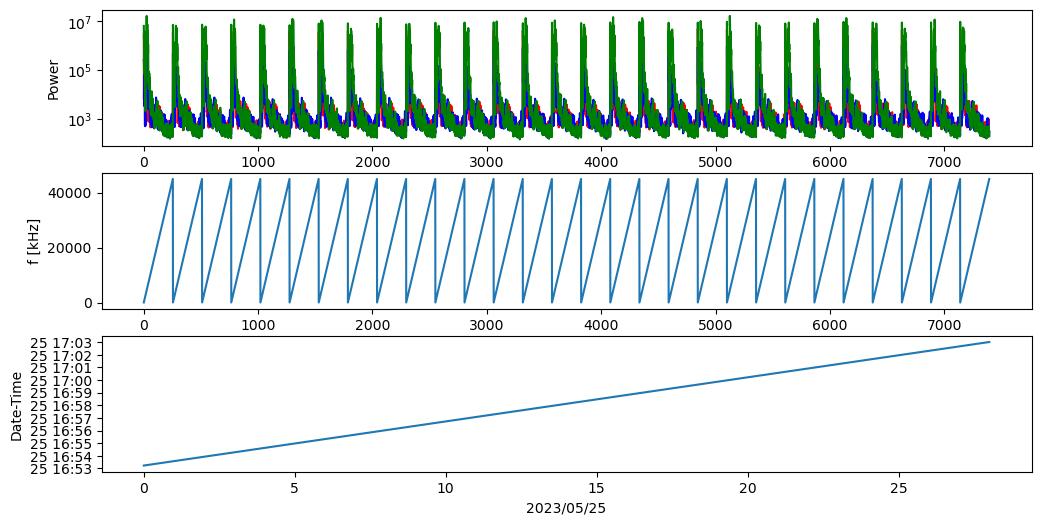

In [6]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.plot(np.ravel(data.EuEu), '-r')
ax1.plot(np.ravel(data.EvEv), '-b')
ax1.plot(np.ravel(data.EwEw), '-g')
ax1.set_yscale('log')
ax2.plot(np.ravel(data.frequency))
ax3.plot(np.ravel(data.epoch))

ax1.set_ylabel('Power')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('Date-Time')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

fig.show
png_fname = work_dir+data_name+'_2.png'
# fig.savefig(png_fname)

# Original

In [7]:
Epoch_1d = data.epoch.tolist()
freq_1d  = data.frequency[0].tolist()

EuEu_2d = data.EuEu.transpose()
EvEv_2d = data.EvEv.transpose()
EwEw_2d = data.EwEw.transpose()

## FT - LOG

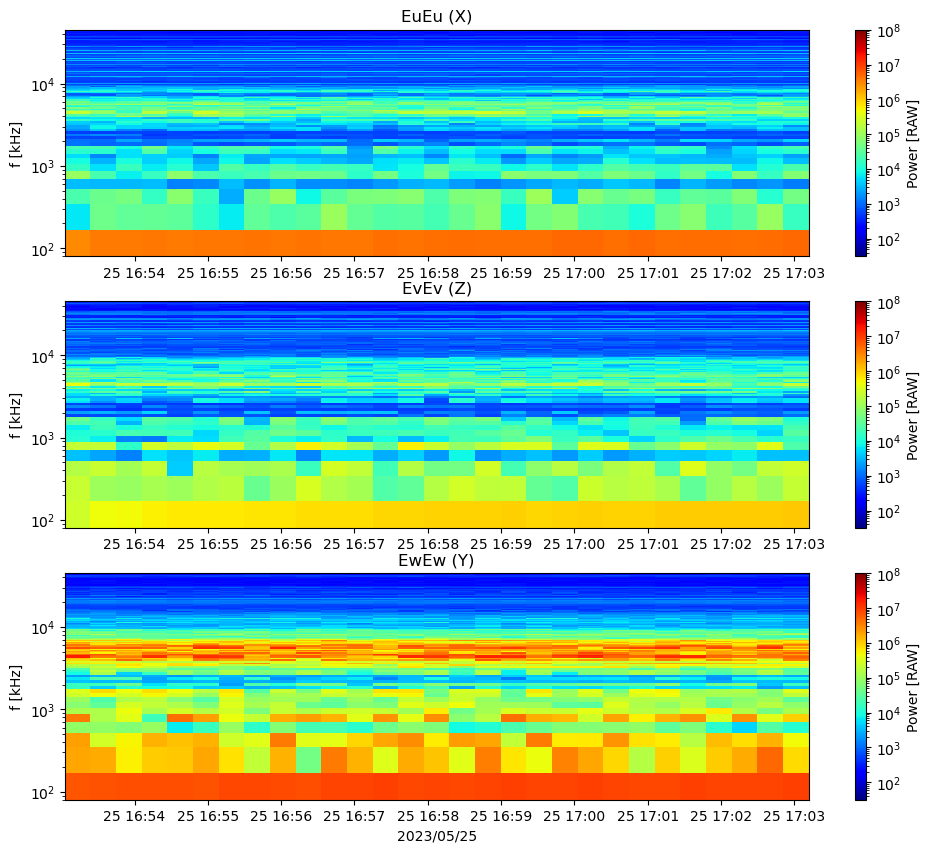

In [8]:
fig2d = plt.figure(figsize=[12,10])

ax1 = fig2d.add_subplot(3, 1, 1)
ax2 = fig2d.add_subplot(3, 1, 2)
ax3 = fig2d.add_subplot(3, 1, 3)

# Y-axis
ax1.set_ylim(f_min, f_max)
ax2.set_ylim(f_min, f_max)
ax3.set_ylim(f_min, f_max)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p3 = ax3.pcolormesh(Epoch_1d, freq_1d, EwEw_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V2@ADC]'
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(str)
pp2 = fig2d.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(str)
pp3 = fig2d.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(str)

plt.show()
png_fname = work_dir+data_name+'_FT-log.png'
# fig2d.savefig(png_fname)


## FT - linear

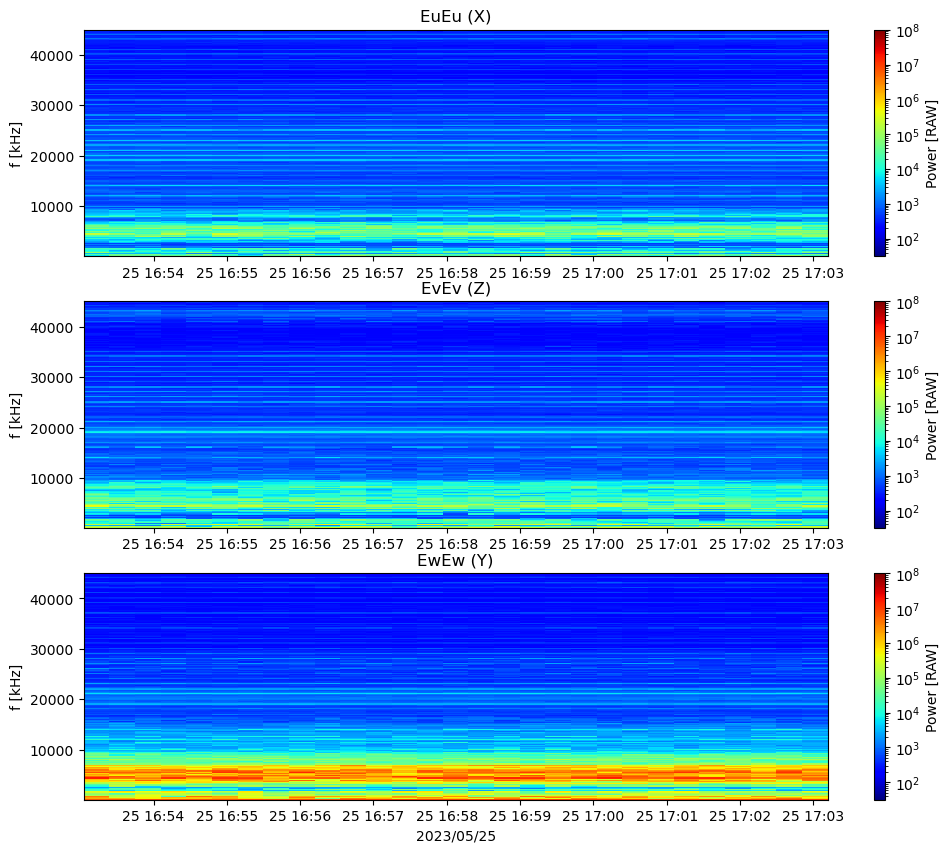

In [9]:
fig2d = plt.figure(figsize=[12,10])

ax1 = fig2d.add_subplot(3, 1, 1)
ax2 = fig2d.add_subplot(3, 1, 2)
ax3 = fig2d.add_subplot(3, 1, 3)

# Y-axis
ax1.set_ylim(f_min, f_max)
ax2.set_ylim(f_min, f_max)
ax3.set_ylim(f_min, f_max)
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p3 = ax3.pcolormesh(Epoch_1d, freq_1d, EwEw_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V2@ADC]'
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(str)
pp2 = fig2d.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(str)
pp3 = fig2d.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(str)

plt.show()
png_fname = work_dir+data_name+'_FT.png'
# fig2d.savefig(png_fname)

## Spec LOG

In [10]:
Eu_power1 = data.EuEu[0]
Ev_power1 = data.EvEv[0]
Ew_power1 = data.EwEw[0]
Eu_power2 = data.EuEu[n_time0]
Ev_power2 = data.EvEv[n_time0]
Ew_power2 = data.EwEw[n_time0]

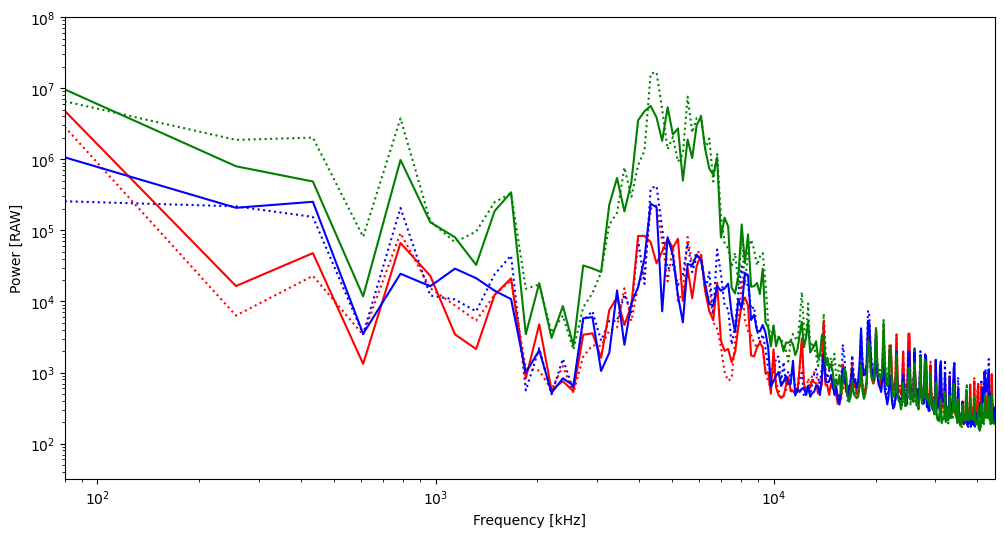

In [11]:
fig, cal = plt.subplots(figsize=(12, 6))

cal.plot(freq_1d, Eu_power1, ':r')
cal.plot(freq_1d, Ev_power1, ':b')
cal.plot(freq_1d, Ew_power1, ':g')
cal.plot(freq_1d, Eu_power2, '-r')
cal.plot(freq_1d, Ev_power2, '-b')
cal.plot(freq_1d, Ew_power2, '-g')

cal.set_xlabel('Frequency [kHz]')
cal.set_xscale('log')
cal.set_xlim(f_min, f_max)

cal.set_yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
cal.set_ylim(10**p_min, 10**p_max)

plt.show
png_fname = work_dir+data_name+'_spec-log.png'
# fig.savefig(png_fname)

## Spec-linear

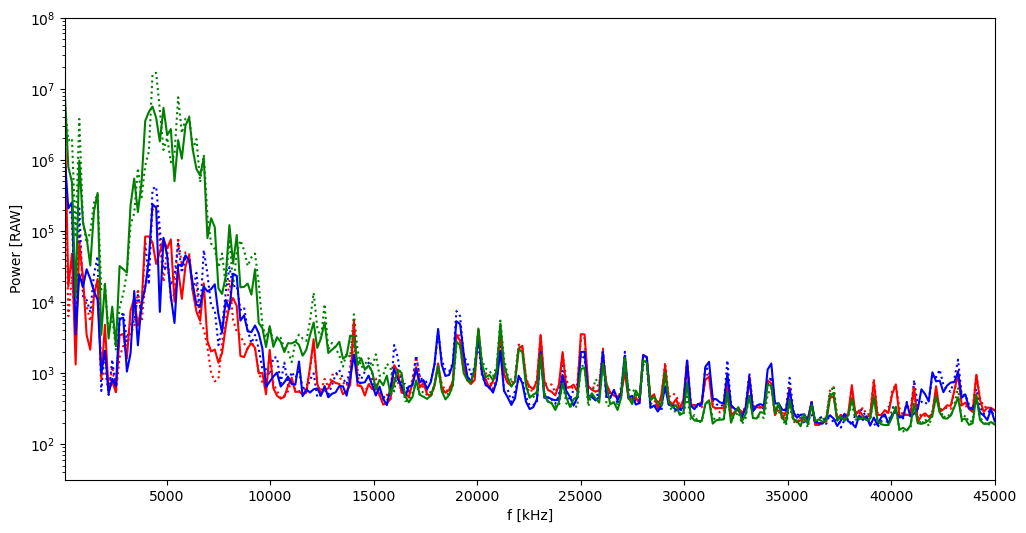

In [12]:
fig, cal = plt.subplots(figsize=(12, 6))

cal.plot(freq_1d, Eu_power1, ':r')
cal.plot(freq_1d, Ev_power1, ':b')
cal.plot(freq_1d, Ew_power1, ':g')
cal.plot(freq_1d, Eu_power2, '-r')
cal.plot(freq_1d, Ev_power2, '-b')
cal.plot(freq_1d, Ew_power2, '-g')

cal.set_xlabel('f [kHz]')
cal.set_xlim(f_min, f_max)

cal.set_yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
cal.set_ylim(10**p_min, 10**p_max)

plt.show
png_fname = work_dir+data_name+'_spec.png'
# fig.savefig(png_fname)

# CLEANED

In [13]:
EuEu_c = juice_cdf.clean_rfi(np.ravel(data.EuEu))
EvEv_c = juice_cdf.clean_rfi(np.ravel(data.EvEv))
EwEw_c = juice_cdf.clean_rfi(np.ravel(data.EwEw))
EuEu_c = EuEu_c.reshape(n_time, n_freq)
EvEv_c = EvEv_c.reshape(n_time, n_freq)
EwEw_c = EwEw_c.reshape(n_time, n_freq)

EuEu_c_2d = EuEu_c.transpose()
EvEv_c_2d = EvEv_c.transpose()
EwEw_c_2d = EwEw_c.transpose()
Eu_c_power1 = EuEu_c[0]
Ev_c_power1 = EvEv_c[0]
Ew_c_power1 = EvEv_c[0]
Eu_c_power2 = EuEu_c[n_time0]
Ev_c_power2 = EvEv_c[n_time0]
Ew_c_power2 = EwEw_c[n_time0]

## CLEANED -- FT LOG

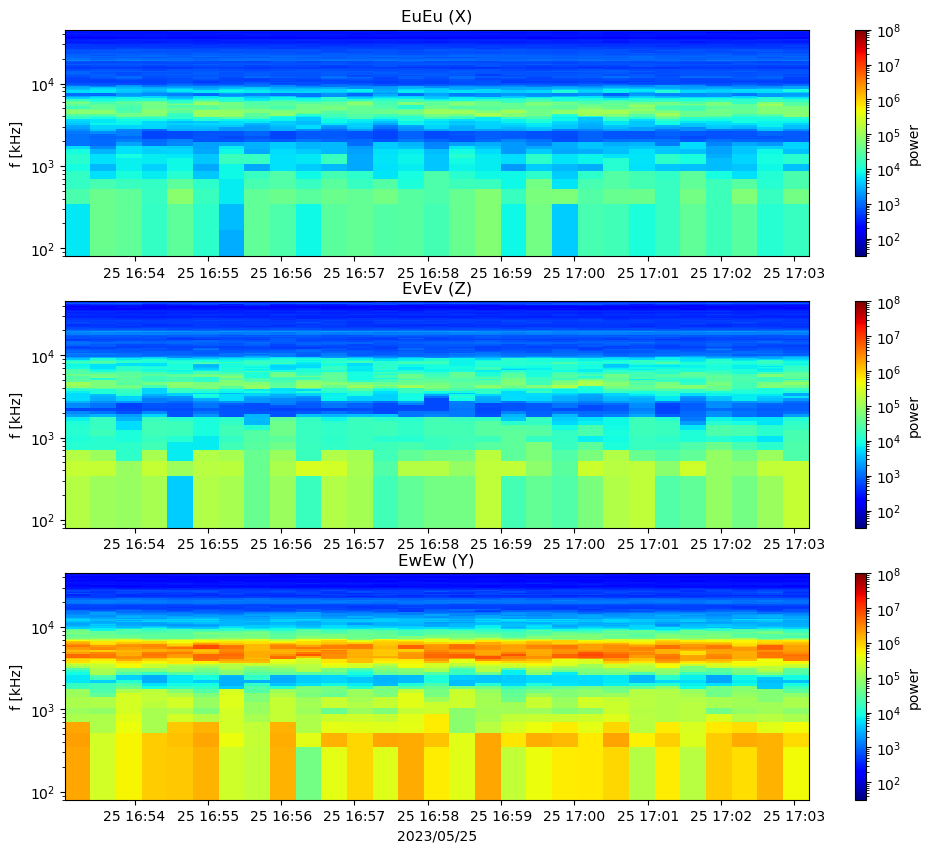

In [14]:
fig2d = plt.figure(figsize=[12,10])

ax1 = fig2d.add_subplot(3, 1, 1)
ax2 = fig2d.add_subplot(3, 1, 2)
ax3 = fig2d.add_subplot(3, 1, 3)

# Y-axis
ax1.set_ylim(f_min, f_max)
ax2.set_ylim(f_min, f_max)
ax3.set_ylim(f_min, f_max)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p3 = ax3.pcolormesh(Epoch_1d, freq_1d, EwEw_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V2@ADC]'
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label('power')
pp2 = fig2d.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label('power')
pp3 = fig2d.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label('power')

plt.show()
png_fname = work_dir+data_name+'_FT-log-clean.png'
# fig2d.savefig(png_fname)

## CLEANED -- FT

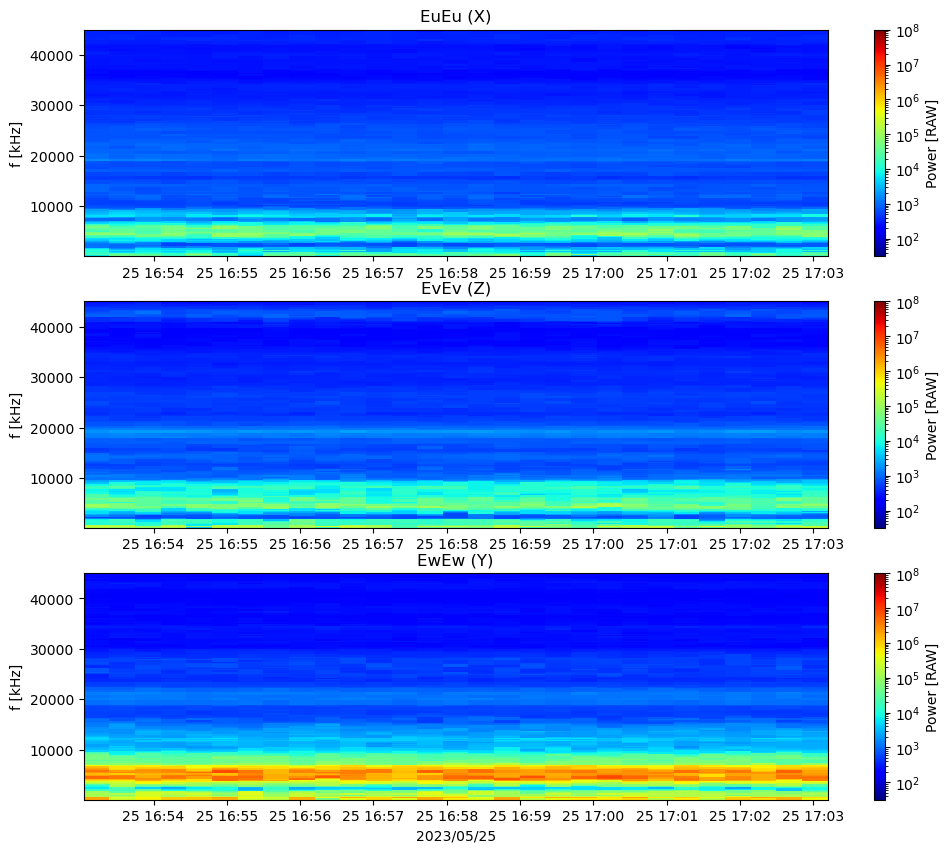

In [15]:
fig2d = plt.figure(figsize=[12,10])

ax1 = fig2d.add_subplot(3, 1, 1)
ax2 = fig2d.add_subplot(3, 1, 2)
ax3 = fig2d.add_subplot(3, 1, 3)

# Y-axis
ax1.set_ylim(f_min, f_max)
ax2.set_ylim(f_min, f_max)
ax3.set_ylim(f_min, f_max)
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p3 = ax3.pcolormesh(Epoch_1d, freq_1d, EwEw_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V^2@ADC]'
pp1 = fig.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(str)
pp2 = fig.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(str)
pp3 = fig.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(str)

plt.show()

png_fname = work_dir+data_name+'_FT-clean.png'
# fig2d.savefig(png_fname)

## CLEANED - Spec LOG

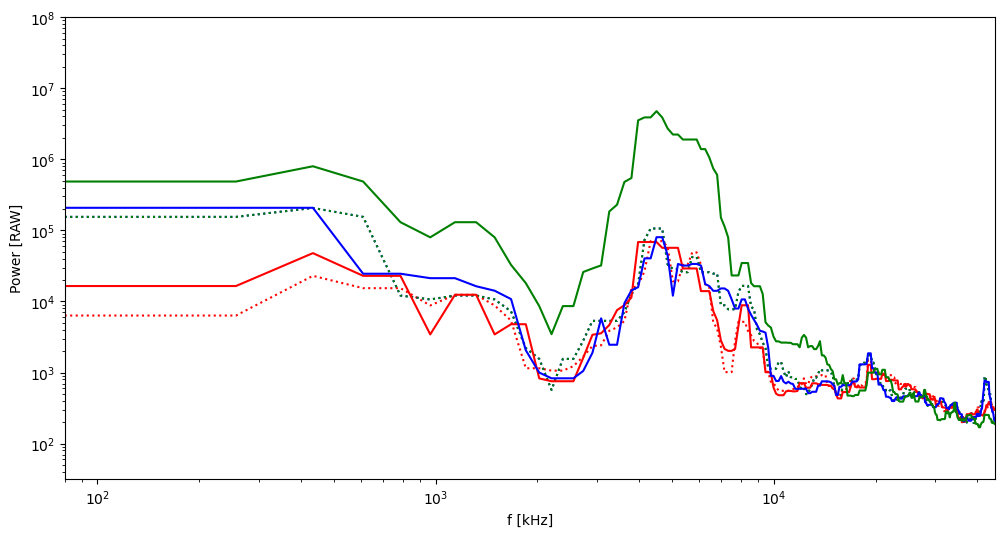

In [16]:
fig, cal = plt.subplots(figsize=(12, 6))

cal.plot(freq_1d, Eu_c_power1, ':r')
cal.plot(freq_1d, Ev_c_power1, ':b')
cal.plot(freq_1d, Ew_c_power1, ':g')
cal.plot(freq_1d, Eu_c_power2, '-r')
cal.plot(freq_1d, Ev_c_power2, '-b')
cal.plot(freq_1d, Ew_c_power2, '-g')

cal.set_xscale('log')
cal.set_xlabel('f [kHz]')
cal.set_xlim(f_min, f_max)

cal.set_yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
cal.set_ylim(10**p_min, 10**p_max)

plt.show
png_fname = work_dir+data_name+'_spec-log-clean.png'
# fig.savefig(png_fname)

## CLEANED Spec Linear

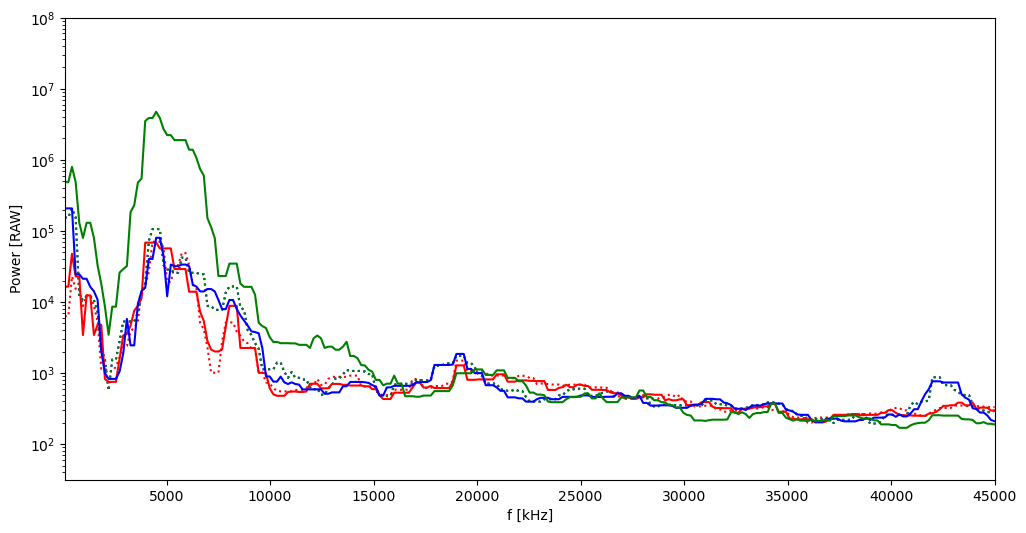

In [17]:
fig, cal = plt.subplots(figsize=(12, 6))

cal.plot(freq_1d, Eu_c_power1, ':r')
cal.plot(freq_1d, Ev_c_power1, ':b')
cal.plot(freq_1d, Ew_c_power1, ':g')
cal.plot(freq_1d, Eu_c_power2, '-r')
cal.plot(freq_1d, Ev_c_power2, '-b')
cal.plot(freq_1d, Ew_c_power2, '-g')

cal.set_xlabel('f [kHz]')
cal.set_xlim(f_min, f_max)

cal.set_yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
cal.set_ylim(10**p_min, 10**p_max)

plt.show
png_fname = work_dir+data_name+'_spec-clean.png'
# fig.savefig(png_fname)